## Logistic Regression example

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn.palettes
import numpy as np
%matplotlib inline

In [100]:
import PIL

In [17]:
np.random.binomial()

In [34]:
X = np.random.normal(size=100)
y = 1 / (1 + np.e ** -X)
# plt.scatter(X, y)

#### Data Prep
Getting Data (from kaggle): https://www.kaggle.com/c/titanic/data?train.csv   

In [114]:
file_path = ('/Users/mbledowski/Downloads/train.csv')

In [162]:
data = np.loadtxt(file_path, dtype = 'str', delimiter=',', skiprows=1)

In [182]:
pclass = data[:, 2].astype(int)
sex = data[:, 5]
age = data[:, 6].astype(int)

In [229]:
pclass1 = tf.to_float(tf.equal(pclass, [1]))
pclass2 = tf.to_float(tf.equal(pclass, [2]))
pclass3 = tf.to_float(tf.equal(pclass, [3]))
gender = tf.to_float(tf.equal(sex, 'female'))
age = tf.to_float(age)
y = tf.to_float(data[:, 1].astype(int).reshape(-1,1))

X = tf.transpose(tf.pack([pclass1, pclass2, pclass3, gender, age]))

### Model

In [355]:
# define graph
W = tf.Variable(tf.zeros(shape=[5,1], dtype=tf.float32))
b = tf.Variable(0.0, dtype=tf.float32)
yhat = tf.matmul(X, W) + b
loss = tf.nn.sigmoid_cross_entropy_with_logits(yhat, y)
learn_rate = 0.00001
optim = tf.train.GradientDescentOptimizer(learning_rate=learn_rate).minimize(loss)

In [356]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [357]:
loss_out = []
for i in range(10000):
    _, l = sess.run([optim, loss])
    loss_out.append(l[0])

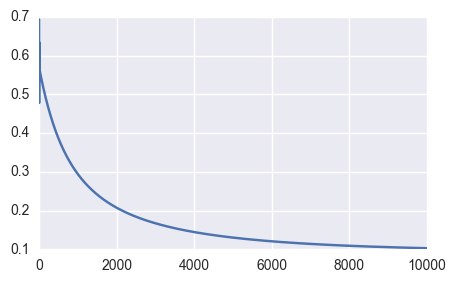

In [368]:
plt.figure(figsize=(5,3))
plt.plot(np.array(loss_out))

In [359]:
sess.run([W, b])

[array([[ 0.76883888],
        [-0.0876148 ],
        [-1.29105079],
        [ 2.4860487 ],
        [-0.01464498]], dtype=float32), -0.60982484]

In [360]:
def predict():
    pred = tf.sigmoid(tf.matmul(X,W)+b)
    return tf.to_int32(tf.greater(pred, 0.5))

def pred_error():
    tf.equal(tf.to_int32(y), predict())

In [361]:
pred = sess.run(predict())
y_ = sess.run(tf.to_int32(y))
float(sum(pred == y_) / float(len(y_)))

0.7845117845117845

In [120]:
# filename_queue = tf.train.string_input_producer([file_path])
# reader = tf.TextLineReader(skip_header_lines=1)
# key, value = reader.read(filename_queue)
# decoded = tf.decode_csv(value, record_defaults=record_defaults)

***

***

## Example tobe used in training

***

***

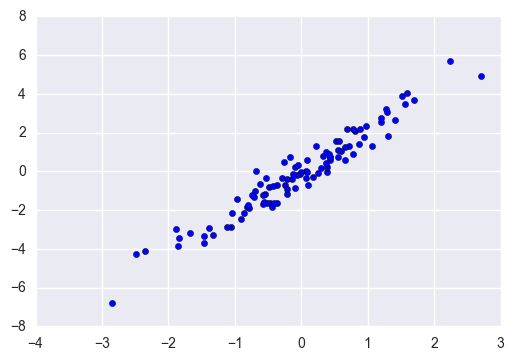

In [83]:
X_ = np.random.normal(size=100)
y_ = np.array([2.179 * i + np.random.normal(0)/ 2 for i in X_])
plt.scatter(X_,y_)

In [84]:
X = tf.to_float(X_)
y = tf.to_float(y_)

In [94]:
W = tf.Variable(0, dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)

yhat =  tf.mul(W, X) + b
loss = tf.reduce_sum(tf.squared_difference(y, yhat))
learning_rate = 0.0001

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [95]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [97]:
loss_out = []
for i in range(200):
    sess.run([optimizer, W])
    loss_out.append(sess.run([loss]))    

In [91]:
W, b = sess.run([W, b])
print W, b

2.04463 -0.0433769


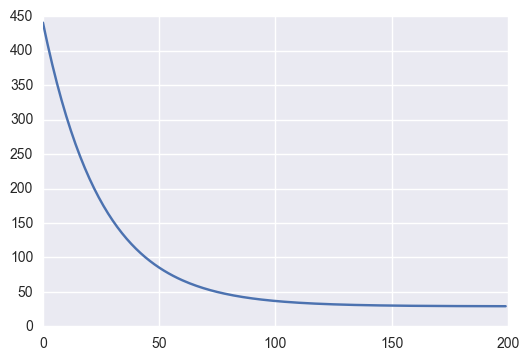

In [89]:
plt.plot(loss_out)

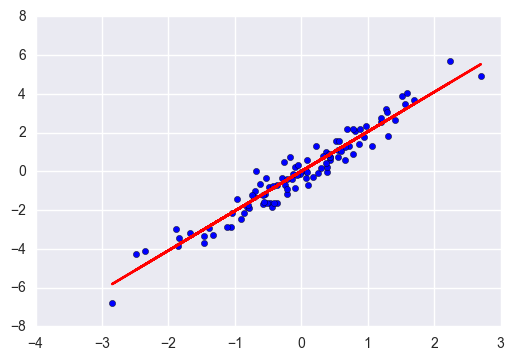

In [93]:
plt.scatter(X_,y_)
plt.plot(X_, X_ * W, color='r')